# Loading Data

In [2]:
data <- read.csv("D:/Research/keyword/Keyword/All/12 journals.csv")
nrow(data)
# str(data)
# head(data$abstract_ratio)
# sum(data[which(data$source.title=="computers and education"),"no_references"])

[1] 5875

# Transforming Variables

In [3]:
na_index <- which(is.na(data$cited.by))
na_index

class(data$quarter)
##data[na_index, "cited.by"] <- 0

integer(0)

[1] "NULL"

# Data Cleaning

In [24]:
# nrow(data)
# summary(data$cited.by_scaled)

# data <- data[data$cited.by_scaled <4,]
# nrow(data)
# summary(data$cited.by_scaled)

In [25]:
# cited.by.table <- table(data$cited.by)
# # cited.by.table
# # round(prop.table(cited.by.table),2) # row percentages 
# rbind(cited.by.table,round(prop.table(cited.by.table),2))

# ##------------------------------------
# cited.by.table <- table(log(data$cited.by_zero))
# # cited.by.table
# # round(prop.table(cited.by.table),2) # row percentages 
# rbind(cited.by.table,round(prop.table(cited.by.table),2))

# Creating New Target Variables

In [4]:
data$cited.by_zero <- 0


for (row in 1:nrow(data))
#     row=1
    {if (data[row,"cited.by"] == 0  & !(is.na(data[row,"cited.by"])))
    data[row,"cited.by_zero"] <- data[row,"cited.by"] + 0.5
    else data[row,"cited.by_zero"] <- data[row,"cited.by"] }
     
#hist(log(data$cited.by_zero))
    
     
#hist   (log(data$cited.by_zero))
#barplot(log(data$cited.by_zero))


# Part 1: Linear Regression for all data points

In [11]:
pred_numeric <- c("abstract_length" ,"page.count","title_length", "abstract_ratio" ,"no_references","no_authors"
                  ,"numkeys", "cited.by_zero", "article_age","weight_ratio")
pred_cat     <- c("quartile")
pred_data     <- data[,c(pred_numeric,pred_cat)]
nrow(data)

linear_reg   <- lm(log(cited.by_zero) ~ abstract_length+log(page.count)+title_length+abstract_ratio+log(no_references)+log(no_authors)+numkeys+
                   article_age+weight_ratio+quartile
                   ,
                   data=pred_data)

summary(linear_reg)
#str(linear_reg)
#round(linear_reg$coefficients ,3)
#summary(linear_reg)$coefficients[,4] 

[1] 5875


Call:
lm(formula = log(cited.by_zero) ~ abstract_length + log(page.count) + 
    title_length + abstract_ratio + log(no_references) + log(no_authors) + 
    numkeys + article_age + weight_ratio + quartile, data = pred_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3323 -0.6838  0.0390  0.7560  3.6180 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.0536568  0.1530249  -0.351 0.725871    
abstract_length     0.0019159  0.0002854   6.712 2.10e-11 ***
log(page.count)    -0.3869697  0.0516804  -7.488 8.04e-14 ***
title_length       -0.0124803  0.0035732  -3.493 0.000482 ***
abstract_ratio      1.6984492  0.5871827   2.893 0.003835 ** 
log(no_references)  0.4007717  0.0306664  13.069  < 2e-16 ***
log(no_authors)     0.1310006  0.0272000   4.816 1.50e-06 ***
numkeys            -0.0028552  0.0115686  -0.247 0.805068    
article_age         0.2363838  0.0050292  47.003  < 2e-16 ***
weight_ratio        3.5031952  0.4711217   7.4

# Model Selection

In [26]:
# linear_reg_step <- step(linear_reg)
# linear_reg_step

In [15]:
# linear_reg_final <- lm(log(cited.by_zero) ~ page.count + abstract_ratio + 
#     no_references + article_age + source.title, data = pred_data)
# summary(linear_reg_final)

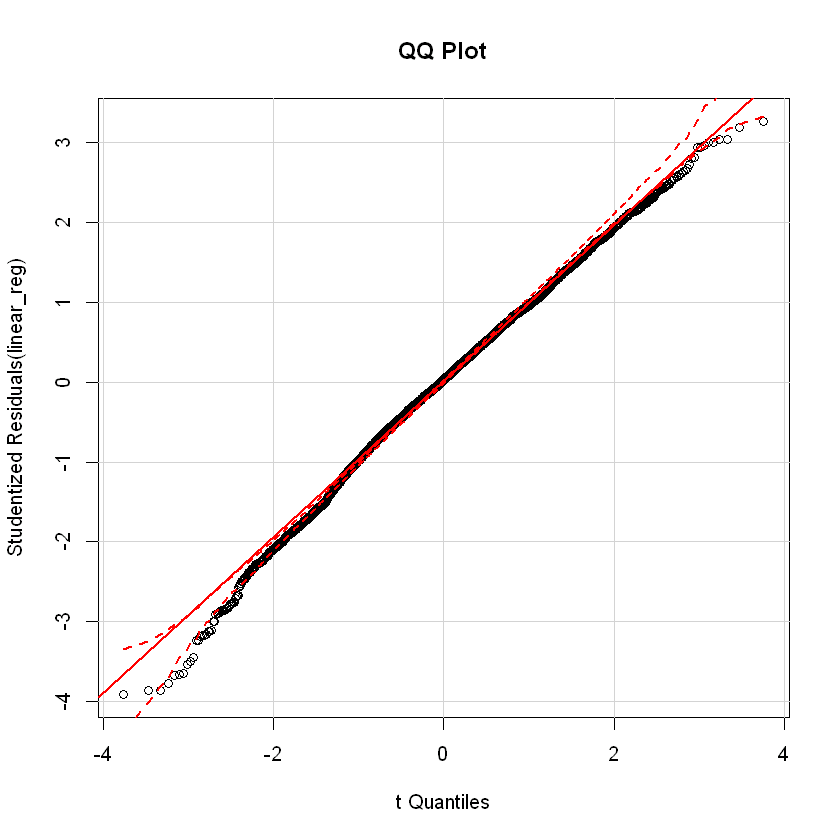

In [12]:
require(car,quietly=TRUE)
qqPlot(linear_reg, main="QQ Plot") #qq plot for studentized resid 
# qqPlot(linear_reg0, main="QQ Plot") #qq plot for studentized resid 


# Outlier Detection

In [18]:
# influenceIndexPlot <- influenceIndexPlot(linear_reg, id.n=10)
# str(influenceIndexPlot)
# outlierTest(linear_reg)
# # data[c(921,922,923),]

In [19]:
# # Influence Plot 
# influencePlot(linear_reg,	id.method="identify", main="Influence Plot", 
#               sub="Circle size is proportial to Cook's Distance",id.n=10 )

# Box-Cox Transformation

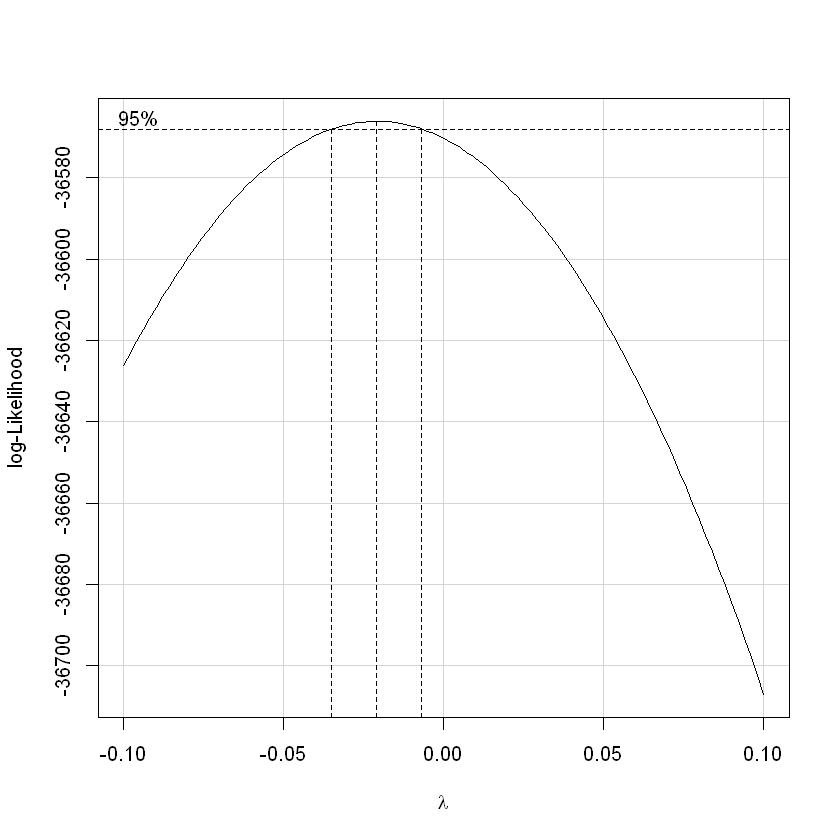

In [8]:
require(MASS, quietly=TRUE)
require(car, quietly=TRUE)

#bcPower(1:5,2)
boxCox <- boxCox(linear_reg, lambda = seq(-0.1, 0.1, by=0.1))

#summary(powerTransform(linear_reg))

#bcPower(linear_reg)
# data$cited.by_zero[1:5]
# basicPower(data$cited.by_zero,lambda=0.05)[1:5]


# Multi-Collinearity

In [39]:
require(car,quietly=TRUE)
# Evaluate Collinearity

vif(linear_reg) # variance inflation factors 
# ??vif
sqrt(vif(linear_reg)) > 2 # problem?


,GVIF,Df,GVIF^(1/(2*Df))
abstract_length,1.120981,1.000000,1.058764
page.count,1.319058,1.000000,1.148503
title_length,1.056342,1.000000,1.027785
abstract_ratio,1.369778,1.000000,1.170375
no_references,1.378585,1.000000,1.174131
no_authors,1.154673,1.000000,1.074557
numkeys,1.152044,1.000000,1.073333
article_age,1.358425,1.000000,1.165515
weight_ratio,1.246552,1.000000,1.116491
quarter,1.592951,3.000000,1.080688


,GVIF,Df,GVIF^(1/(2*Df))
abstract_length,FALSE,FALSE,FALSE
page.count,FALSE,FALSE,FALSE
title_length,FALSE,FALSE,FALSE
abstract_ratio,FALSE,FALSE,FALSE
no_references,FALSE,FALSE,FALSE
no_authors,FALSE,FALSE,FALSE
numkeys,FALSE,FALSE,FALSE
article_age,FALSE,FALSE,FALSE
weight_ratio,FALSE,FALSE,FALSE
quarter,FALSE,FALSE,FALSE


In [17]:
round(confint(linear_reg),2)

,2.5 %,97.5 %
(Intercept),0.32,0.71
abstract_length,0,0
page.count,-0.03,-0.02
title_length,-0.02,0.00
abstract_ratio,0.89,3.21
no_references,0.01,0.01
no_authors,0.02,0.06
numkeys,-0.02,0.02
article_age,0.22,0.24
weight_ratio,2.53,4.39


In [12]:
# hist(log(data$cited.by+0.5))

In [15]:
save.image()